In [6]:
%load_ext autoreload
%autoreload 2
from matricesRalas import MatrizRala
from GaussJordan import GaussJordan
from funciones_utiles import norma
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Dado el grafo $\mathnormal{G} = (\mathnormal{N}, \mathnormal{A})$ en donde $\mathnormal{N}$ es el conjunto de papers $\{\mathbf{A}, ... , \mathbf{K}\}$ (lo representamos como el conjunto $\{0, ... , \mathsf{N}\}$ ) y $\mathnormal{A}$ son los arcos dirigidos, los cuales represetan las citas. Se tiene que un arco $a_{ij} \in \mathnormal{A}$ con $i \in \mathnormal{N} \land j \in \mathnormal{N} \Leftrightarrow i$ cita a $j$.

De este modo, definimos la entrada $w_{ij}$ de la matriz $\mathnormal{W}$ como:

$$   
w_{ij} =
\begin{cases}
  1 & \text{si} \; a_{ij} \in \mathnormal{A} \\
  0 & \text{si} \; a_{ij} \notin \mathnormal{A}
\end{cases}
$$

Del mismo modo, definimos la entrada $d_{ii}$ (solo completamos la diagonal, los demas valores son 0) de la matriz $\mathnormal{D}$ como:

$$   
d_{ii} =
\begin{cases}
  \frac{1}{c_{i}} & \text{si} \; c_{i} \neq 0 \\
  0 & \text{si} \; c_{i} = 0
\end{cases}
$$

En donde 
$$
c_{i} = \sum_{k = 0}^{\mathsf{N}} w_{ki}
$$

In [7]:
# Defino a la matriz {A, ..., K} como los índices {0, ..., 10} (o lo que es lo mismo {1,...,11})
W = MatrizRala(11,11)
W[0,2] = 1
W[0,3] = 1
W[0,4] = 1
W[1,0] = 1
W[4, 10] = 1
W[5,0] = 1
W[5, 6] = 1
W[6, 0] = 1
W[6, 7] = 1
W[6, 8] = 1
W[7, 8] = 1
W[8, 5] = 1
W[9, 8] = 1

D = MatrizRala(11,11)
D[0,0] = 1/3
D[2,2] = 1
D[3,3] = 1
D[4,4] = 1
D[5,5] = 1
D[6,6] = 1
D[7,7] = 1
D[8,8] = 1/3
D[10,10] = 1

# Armamos el vector de 1's
unos = unos = MatrizRala(11,1)
for i in range(11):
    unos[i,0] = 1

Si el sistema converge, se tiene que:

$\textbf{p*} = \frac{1-d}{N}*\mathbb{1} + dWD\textbf{p*}$ 

Reemplazando con $d=0,85$ y $N = 11$, y despejando en función de $\textbf{p*}$ queda que:

$(\mathbb{I} - dWD) \textbf{p*} = \frac{0,15}{11}*\mathbb{1}$ 


DSP HACEMOS GJ CON ESTAS MATRICES

2- USAR EL METODO ITERATIVO y GRAFICAR
Para realizar la comparación, graficar la diferencia absoluta entre pt y p∗ para valores de t hasta
ver que converge.

In [8]:
# Con GJ

d = 0.85

b = MatrizRala(W.shape[0], 1)

for nro_fila in range(b.shape[0]):
    b[nro_fila, 0] = (1 - d) / (b.shape[0])

Id = MatrizRala(W.shape[0], W.shape[1])
for nro_fila in range(Id.shape[0]):
    Id[nro_fila, nro_fila] = 1

# SE CONSTRUYE DE A = I - d * W @ D

A = Id - d * W @ D

solucion = GaussJordan(A,b)
print(solucion)

MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892239 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])


Ahora queremos analizar la convergencia del sistema de forma iterativa. Para ellos iteramos siguiendo la ecuación $\textbf{p}_{t+1} = \frac{1-d}{N}*\mathbb{1} + dWD\textbf{p}_{t}$  hasta que $\|(\textbf{p}_{t+1} - \textbf{p}_{t})\| < \varepsilon$

Ademas queremos graficar como se va modificando $\|(\textbf{p}_{t+1} - \textbf{p}_{t})\|$ entre cada iteracion, es decir queremos ver como se modifica el valor de $\|(\textbf{p}_{1} - \textbf{p}_{0})\|$ con respecto a $\|(\textbf{p}_{2} - \textbf{p}_{1})\|$ y asi sucesivamente.

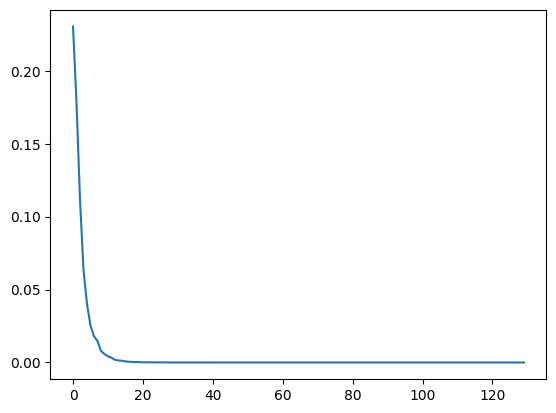

MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418682 ]
    [ 0.10029571499316095 ]
    [ 0.04529098844839167 ]
    [ 0.11172220521892244 ]
    [ 0.04529098844839167 ]
    [ 0.01363636363636364 ]
])


In [9]:
# Método iterativo

import time

# Recordemos W, D y d

# Construimos p_0
p_t = MatrizRala(11,1)
for i in range(11):
    p_t[i,0] = 1/11

i = 0

# Lista de diferencias de normas.
#Para todo i (0 <= i <= |diferencias|) se tiene que, posicion diferencias[i] = norma(p_i+1 - p_i)
diferencias = []

while i == 0 or diferencias[i-1] > 0:
    if (i != 0):
        p_t = p_next
    
    inicio = time.time()
    
    p_next = unos * ((1 - d) / 11) + d * W @ D @ p_t

    fin = time.time()
    diferencias.append(norma(p_next-p_t))

    i += 1

# Grafico
xs = [x for x in range(len(diferencias))]
plt.plot(xs, diferencias)
plt.show()

# Make sure to close the plt object once done
plt.close()
    
print(p_next)

